Group 1 - LC09
- 2502004102 - Musyaffa Ayman Rafif
- 2502020711 - Gede Sanjaya Indrajaya
- 2502026526 - Muhammad Kent Al-Ghazi
- 2502029370 - Johnny

# Prediksi Status Pencemaran Udara di DKI Jakarta

Status pencemaran udara di DKI Jakarta muncul karena masalah pencemaran udara merupakan salah satu masalah kesehatan masyarakat yang penting di Indonesia, terutama di wilayah DKI Jakarta. Pencemaran udara dapat menyebabkan berbagai macam penyakit, seperti asma, bronkitis, dan penyakit jantung. Selain itu, pencemaran udara juga dapat mengurangi kualitas hidup masyarakat dan menurunkan produktivitas.

Untuk mengurangi dampak negatif dari pencemaran udara, diperlukan upaya-upaya pencegahan dan pengendalian yang efektif. Salah satu cara untuk melakukannya adalah dengan memprediksi status pencemaran udara di masa yang akan datang, sehingga dapat diambil tindakan preventif yang tepat. Penelitian tentang prediksi status pencemaran udara di DKI Jakarta dapat memberikan informasi yang berguna bagi pemerintah dan masyarakat dalam mengelola pencemaran udara dan meningkatkan kualitas udara di wilayah tersebut.

Oleh karena itu, kami ingin memprediksi tingkat pencemaran udara di Jakarta menggunakan classification algorithm.

## Import Library

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

## Setup The Data

In [2]:
path_dir = '/work/Data2020'
os.chdir(path_dir)
os.getcwd()

'/work/Data2020'

Sumber data: https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2020

In [3]:
csv_2020 = glob.glob('*.{}'.format('csv'))
csv_2020

['indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2020.csv']

In [4]:
csv_2020.remove('indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2020.csv')

In [5]:
csv_2020

['indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2020.csv',
 'indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2020.csv']

In [6]:
df_2020 = pd.concat([pd.read_csv(file) for file in csv_2020 ], ignore_index=True)

In [7]:
df_2020.head(5)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-12-01,DKI1 (Bunderan HI),22,17,4,19,8,26.0,PM25,BAIK
1,2020-12-02,DKI1 (Bunderan HI),25,18,4,28,7,48.0,PM25,BAIK
2,2020-12-03,DKI1 (Bunderan HI),29,19,8,48,14,48.0,O3,BAIK
3,2020-12-04,DKI1 (Bunderan HI),39,29,8,52,17,58.0,PM25,SEDANG
4,2020-12-05,DKI1 (Bunderan HI),28,22,7,34,11,34.0,O3,BAIK


In [8]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1675 non-null   object 
 1   stasiun   1675 non-null   object 
 2   pm10      1675 non-null   object 
 3   so2       1675 non-null   object 
 4   co        1675 non-null   object 
 5   o3        1675 non-null   object 
 6   no2       1675 non-null   object 
 7   max       1674 non-null   float64
 8   critical  1662 non-null   object 
 9   categori  1675 non-null   object 
dtypes: float64(1), object(9)
memory usage: 131.0+ KB


In [9]:
df_2020['tanggal'] = pd.to_datetime(df_2020['tanggal'], yearfirst=True)
print(type(df_2020.tanggal[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
df_2020_sorted = df_2020.sort_values(by = 'tanggal', ascending = True).reset_index(drop = True)
# df_2020_sorted.head()
df_2020_sorted.head(5)

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI5 (Kebon Jeruk) Jakarta Barat,35,13,18,46,---,46.0,O3,BAIK
1,2020-01-01,DKI4 (Lubang Buaya),33,36,---,36,6,36.0,SO2,BAIK
2,2020-01-01,DKI2 (Kelapa Gading),31,7,8,41,5,41.0,O3,BAIK
3,2020-01-01,DKI3 (Jagakarsa),38,11,25,41,---,41.0,O3,BAIK
4,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK


In [11]:
df_2020_sorted.replace('---', np.NaN, inplace=True) # Ganti '---' menjadi NaN

In [12]:
save_dir = '/work/DataFixed'
os.chdir(save_dir)
os.getcwd()

'/work/DataFixed'

In [13]:
df_2020_sorted.to_csv('indeks-standar-pencemaran-udara-di-spku-tahun-2020.csv', index=False)

## Load Data

In [14]:
data_dir = '/work/DataFixed'
os.chdir(data_dir)
os.getcwd()

'/work/DataFixed'

In [15]:
df = pd.read_csv('indeks-standar-pencemaran-udara-di-spku-tahun-2020.csv')

In [16]:
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI5 (Kebon Jeruk) Jakarta Barat,35.0,13.0,18.0,46.0,NaN,46.0,O3,BAIK
1,2020-01-01,DKI4 (Lubang Buaya),33.0,36.0,NaN,36.0,6.0,36.0,SO2,BAIK
2,2020-01-01,DKI2 (Kelapa Gading),31.0,7.0,8.0,41.0,5.0,41.0,O3,BAIK
3,2020-01-01,DKI3 (Jagakarsa),38.0,11.0,25.0,41.0,NaN,41.0,O3,BAIK
4,2020-01-01,DKI1 (Bunderan HI),30.0,20.0,10.0,32.0,9.0,32.0,O3,BAIK


In [17]:
df.tail()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
1670,2020-12-31,DKI2 (Kelapa Gading),33.0,16.0,11.0,64.0,9.0,64.0,O3,SEDANG
1671,2020-12-31,DKI1 (Bunderan HI),26.0,25.0,8.0,29.0,10.0,39.0,PM25,BAIK
1672,2020-12-31,DKI4 (Lubang Buaya),28.0,36.0,10.0,27.0,3.0,36.0,PM25,BAIK
1673,2020-12-31,DKI5 (Kebon Jeruk) Jakarta Barat,18.0,13.0,6.0,24.0,3.0,24.0,CO,BAIK
1674,2020-12-31,DKI3 (Jagakarsa),41.0,10.0,9.0,24.0,27.0,41.0,PM10,BAIK


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   1675 non-null   object 
 1   stasiun   1675 non-null   object 
 2   pm10      1626 non-null   float64
 3   so2       1630 non-null   float64
 4   co        1648 non-null   float64
 5   o3        1655 non-null   float64
 6   no2       1623 non-null   float64
 7   max       1674 non-null   float64
 8   critical  1662 non-null   object 
 9   categori  1675 non-null   object 
dtypes: float64(6), object(4)
memory usage: 131.0+ KB


In [19]:
df.shape

(1675, 10)

Dataset ini berisi mengenai Indeks Standar Pencemaran Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta Tahun 2020

Penjelasan variabel dari data sebagai berikut:
1. tanggal : Tanggal pengukuran kualitas udara
2. stasiun : Lokasi pengukuran di stasiun
3. pm10 : Partikulat salah satu parameter yang diukur
4. so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
5. co : Carbon Monoksida salah satu parameter yand diukur
6. o3 : Ozon salah satu parameter yang diukur
7. no2 : NItrogen dioksida salah satu parameter yang diukur
8. max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama
9. critical : Parameter yang hasil pengukurannya paling tinggi
10. categori : Kategori hasil perhitungan indeks standar pencemaran udara

Di dalam dataset ini, terdapat:
- 1675 entries
- 10 attributes
- 4 attributes memiliki tipe data 'string` dan 6 attributes sisanya memiliki tipe data 'float'
- Missing values di 7 attributes ('pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical')

In [20]:
df.describe()

,pm10,so2,co,o3,no2,max
count,1626.000000,1630.000000,1648.000000,1655.000000,1623.000000,1674.000000
mean,51.461870,23.124540,17.572816,56.913595,14.128774,61.644564
std,15.037924,16.224857,16.570199,28.206449,19.831909,27.862435
min,5.000000,1.000000,3.000000,3.000000,0.000000,0.000000
25%,41.000000,15.000000,8.000000,37.000000,6.000000,46.000000
50%,53.000000,20.000000,13.000000,56.000000,8.000000,63.000000
75%,62.000000,26.000000,20.000000,74.000000,12.000000,78.000000
max,111.000000,112.000000,135.000000,191.000000,148.000000,191.000000


## Feature Engineering

### Menghilangkan Atribut Yang Tidak Relevan

In [21]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori'],
      dtype='object')

In [22]:
df = df.drop(['tanggal', 'stasiun'], axis=1)

In [23]:
df.head(5)

,pm10,so2,co,o3,no2,max,critical,categori
0,35.0,13.0,18.0,46.0,NaN,46.0,O3,BAIK
1,33.0,36.0,NaN,36.0,6.0,36.0,SO2,BAIK
2,31.0,7.0,8.0,41.0,5.0,41.0,O3,BAIK
3,38.0,11.0,25.0,41.0,NaN,41.0,O3,BAIK
4,30.0,20.0,10.0,32.0,9.0,32.0,O3,BAIK


### Handling Missing Value

In [24]:
df.isnull().sum()

pm10        49
so2         45
co          27
o3          20
no2         52
max          1
critical    13
categori     0
dtype: int64

In [25]:
print("Total missing value: {}".format(df.isnull().values.sum()))
print("Persentase missing value: {:.2f}%".format(((df.isnull().values.sum())/len(df))*100))

Total missing value: 207
Persentase missing value: 12.36%


Missing values adalah nilai-nilai yang tidak ada atau tidak tercatat dalam suatu data set. Hal ini dapat terjadi karena beberapa alasan, seperti kesalahan pengisian formulir, kesalahan saat mengumpulkan data, atau karena sengaja tidak diisi oleh responden.

Jumlah missing values dapat ditentukan dengan menghitung berapa banyak nilai yang hilang dari jumlah total data yang ada. Dalam kasus ini terdapat 207 missing values dari jumlah data yang ada.

Akurasi missing values adalah persentase dari jumlah missing values terhadap jumlah total data yang ada. Dalam contoh yang Anda sebutkan, akurasi missing values sebesar 12.36%. Ini berarti bahwa sekitar 12.36% dari data yang ada merupakan missing values.

In [26]:
df['pm10'].fillna(df['pm10'].mean(), inplace = True)
df['so2'].fillna(df['so2'].median(), inplace = True)
df['co'].fillna(df['co'].median(), inplace = True)
df['o3'].fillna(df['o3'].median(), inplace = True)
df['no2'].fillna(df['no2'].median(), inplace = True)
df['max'].fillna(df['max'].mean(), inplace = True)

In [27]:
df.dropna(inplace=True) # Untuk menghapus Null Value di kolom `critical`

In [28]:
df.isnull().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64

### Handling Outliers

In [29]:
df.columns

Index(['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori'], dtype='object')

In [30]:
df_num = df.iloc[:,0:6]
df_num.head()

,pm10,so2,co,o3,no2,max
0,35.0,13.0,18.0,46.0,8.0,46.0
1,33.0,36.0,13.0,36.0,6.0,36.0
2,31.0,7.0,8.0,41.0,5.0,41.0
3,38.0,11.0,25.0,41.0,8.0,41.0
4,30.0,20.0,10.0,32.0,9.0,32.0


In [31]:
def remove_outliers(df):
    df_noOutliers = df.copy()
    for i in df_noOutliers.columns:
        Q1 = df_noOutliers[i].quantile(0.25)
        Q3 = df_noOutliers[i].quantile(0.75)
        IQR = Q3-Q1

        upperBound = Q3 + (1.5*IQR) 
        lowerBound = Q1 - (1.5*IQR) 

        df_noOutliers = df_noOutliers[df_noOutliers[i] <= upperBound]
        df_noOutliers = df_noOutliers[df_noOutliers[i] >= lowerBound]

        df_noOutliers = df_noOutliers.reset_index(drop = True)
    return df_noOutliers

def percentageOf(value, totalValue):
    return (value / totalValue) * 100

In [32]:
df_clean = remove_outliers(df_num)


print("Number of outliers removed: {}".format(len(df_num)-len(df_clean)))
print("Length of dataset available: {}".format(len(df_clean)))
print("Percentage Retained: {}%".format(int(percentageOf(len(df_clean), len(df_num)))))

Number of outliers removed: 297
Length of dataset available: 1365
Percentage Retained: 82%


Outliers adalah data yang berada di luar batas normal dari sebuah distribusi data. Biasanya, outliers dapat mengganggu analisis dan interpretasi data karena nilai-nilai tersebut sangat berbeda dibandingkan dengan nilai-nilai lain dalam data set. Oleh karena itu, biasanya dilakukan penghapusan atau penanganan terhadap outliers agar tidak mempengaruhi hasil analisis yang akan dilakukan.

Dari dataset ini terdapat 297 outliers yang telah dihapus dari jumlah data yang tersedia, sehingga jumlah data yang tersisa sebanyak 1365 data. Ini berarti bahwa sekitar 82% dari data yang tersedia masih tersedia setelah penghapusan outliers. Persentase ini dapat digunakan sebagai acuan untuk mengetahui seberapa besar pengaruh penghapusan outliers terhadap jumlah data yang tersedia.

In [33]:
df = df[df.index.isin(df_clean.index)]

In [34]:
len(df)

1355

### Mengubah Data Kategorikal Menjadi Numerik Dengan Encoding

In [35]:
df['categori'].value_counts()

SEDANG         1022
BAIK            216
TIDAK SEHAT     117
Name: categori, dtype: int64

In [36]:
mapping = {'BAIK': 0,'SEDANG': 1, 'TIDAK SEHAT': 2}
df['target'] = df['categori'].map(mapping)

In [37]:
df['target'].value_counts()

1    1022
0     216
2     117
Name: target, dtype: int64

### Handling Imbalance Target Variable

In [38]:
df.columns

Index(['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori',
       'target'],
      dtype='object')

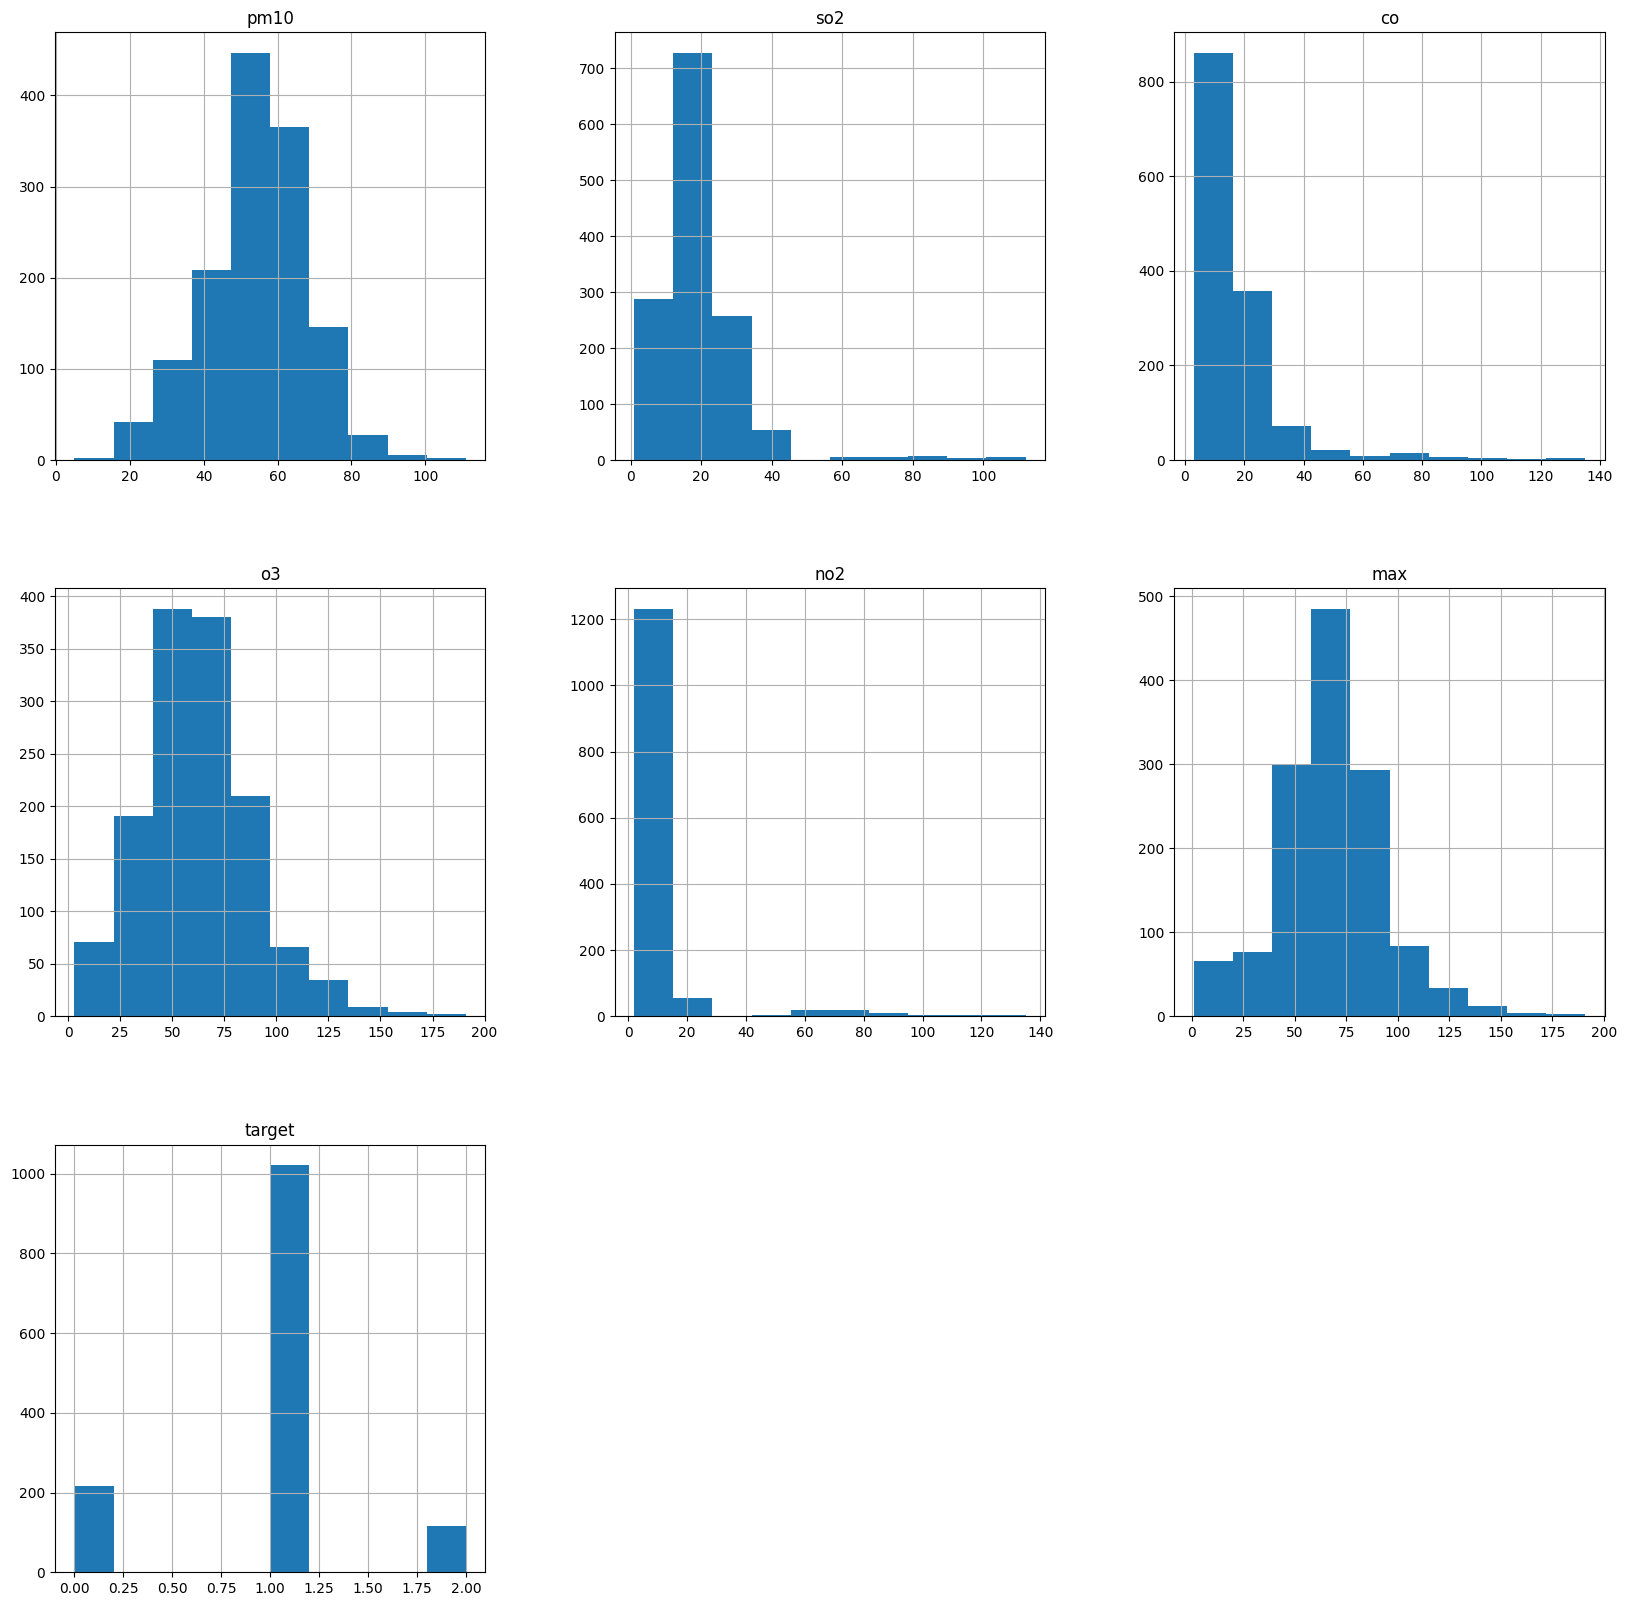

In [39]:
plot = df.hist(figsize = (20,20))

In [40]:
X = df.drop(['critical','categori','target'], axis = 1)
y = df['target']

In [41]:
X.head(5)

,pm10,so2,co,o3,no2,max
0,35.0,13.0,18.0,46.0,8.0,46.0
1,33.0,36.0,13.0,36.0,6.0,36.0
2,31.0,7.0,8.0,41.0,5.0,41.0
3,38.0,11.0,25.0,41.0,8.0,41.0
4,30.0,20.0,10.0,32.0,9.0,32.0


In [42]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [43]:
proporsi_target = y.value_counts()
baik = (proporsi_target[0] / len(y)) *100
sedang = (proporsi_target[1] / len(y)) * 100
tidak_baik = (proporsi_target[2] / len(y)) * 100
total = baik+sedang+tidak_baik
print(f"0: {baik:.2f}%")
print(f"1: {sedang:.2f}%")
print(f"2: {tidak_baik:.2f}%")
print(f"Total: {total:.2f}%")

0: 15.94%
1: 75.42%
2: 8.63%
Total: 100.00%


In [44]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(sampling_strategy='all', random_state=24)
X_res, y_res = sme.fit_resample(X, y)
y_res.value_counts()

2    1020
0    1010
1     947
Name: target, dtype: int64

SMOTEENN adalah gabungan dari teknik SMOTE dan ENN (Edited Nearest Neighbors). SMOTE digunakan untuk menambahkan data sintetis ke dalam data minoritas, sedangkan ENN digunakan untuk menghapus data yang tidak perlu dari kelas mayoritas. SMOTEENN berguna untuk meningkatkan jumlah data minoritas tanpa terlalu banyak menambah data kelas mayoritas, serta menghapus data yang tidak perlu dari kelas mayoritas.

### Cek Penyebaran Data Setelah Sampling

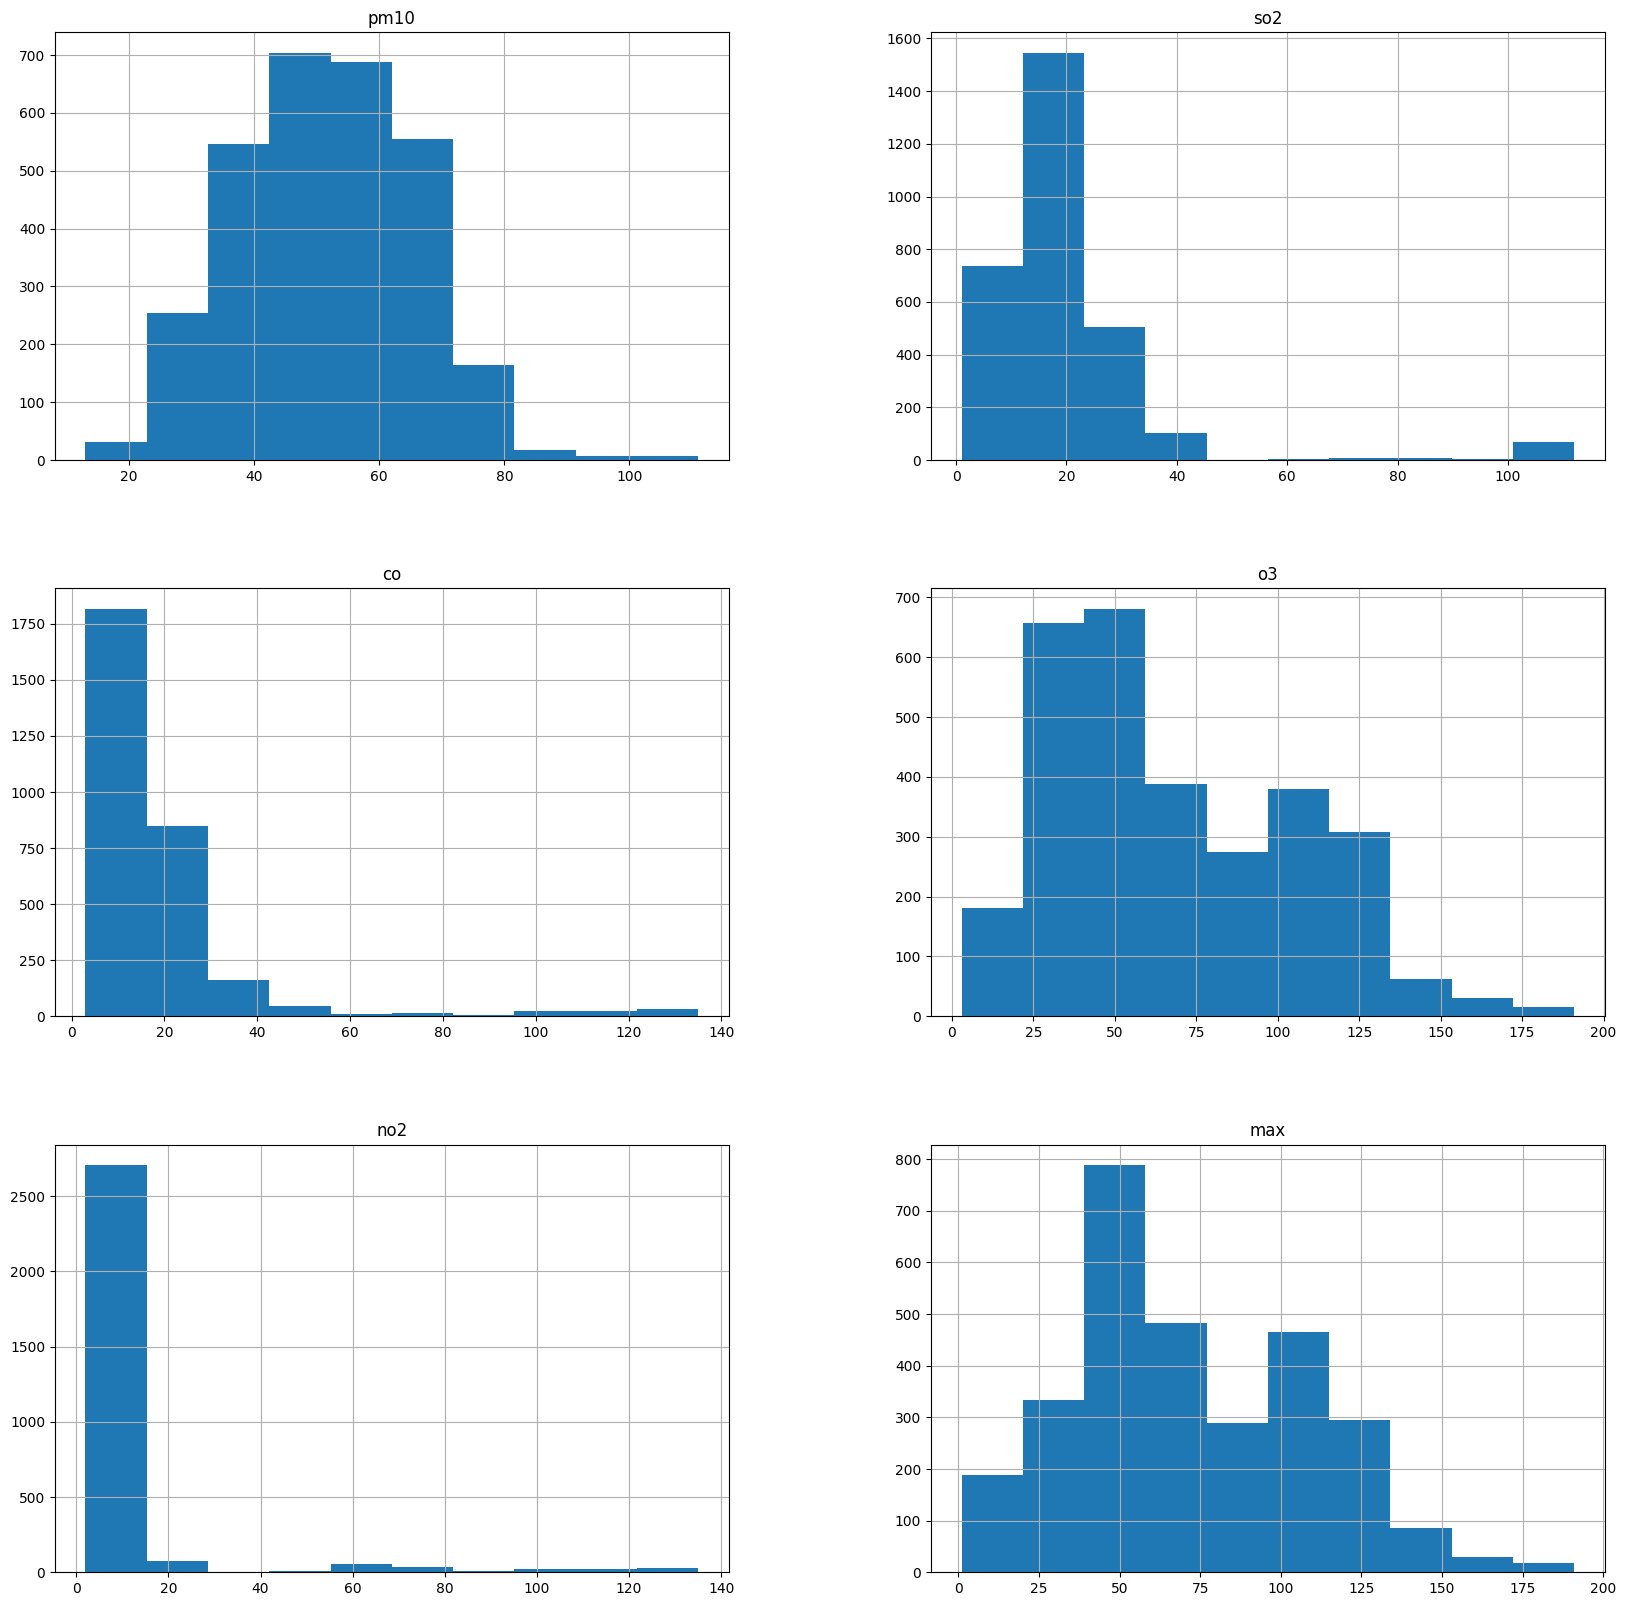

In [45]:
plot = X_res.hist(figsize = (20,20))

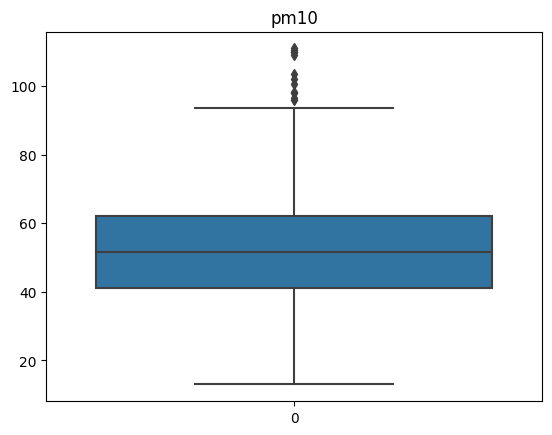

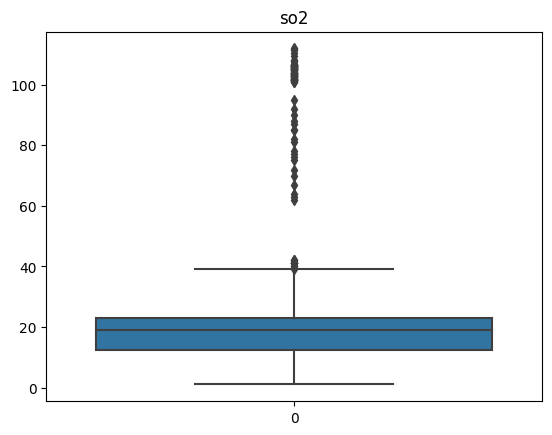

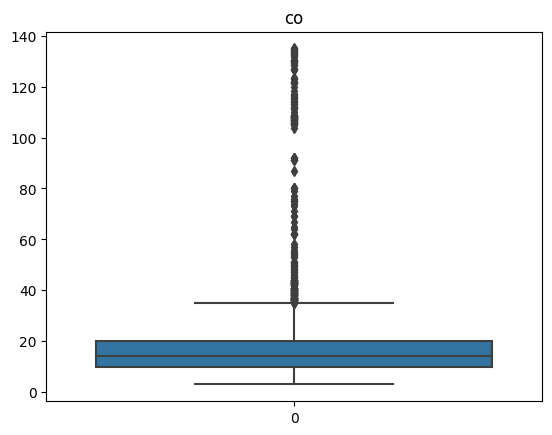

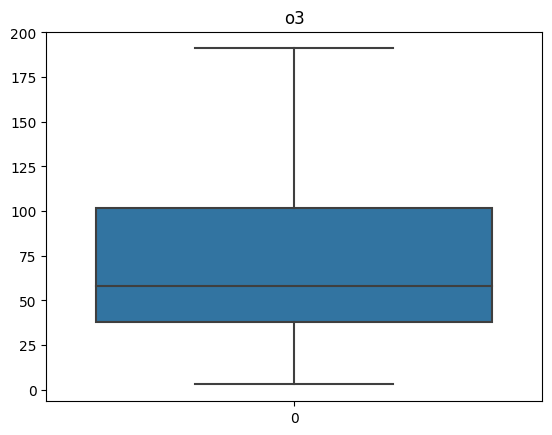

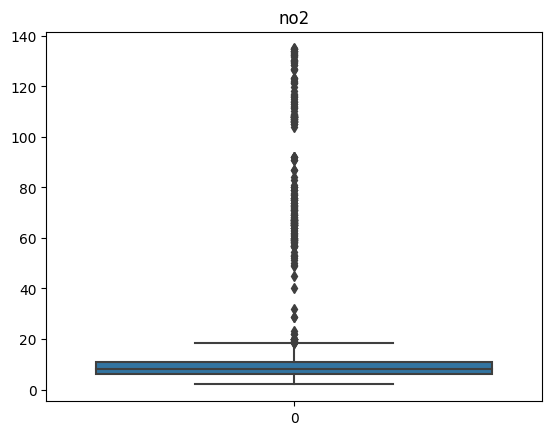

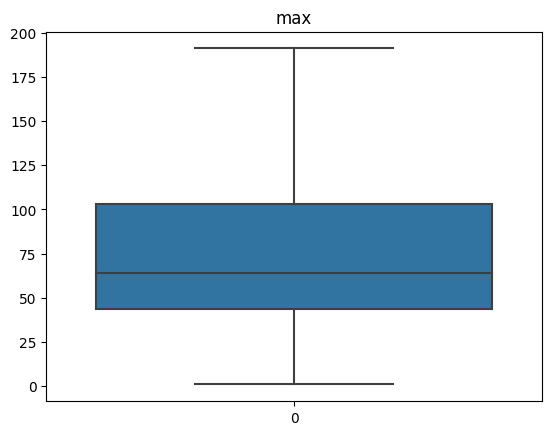

In [46]:
for i in X_res.columns:
    sns.boxplot(data = X_res[i])
    plt.title(i)
    plt.show()

In [47]:
X_res_noOutliers = remove_outliers(X_res)

print("Number of outliers removed: {}".format(len(X_res)-len(X_res_noOutliers)))
print("Length of dataset available: {}".format(len(X_res_noOutliers)))
print("Percentage Retained: {}%".format(int(percentageOf(len(X_res_noOutliers), len(X_res)))))

Number of outliers removed: 385
Length of dataset available: 2592
Percentage Retained: 87%


In [48]:
y_res = y_res[y_res.index.isin(X_res_noOutliers.index)]

In [49]:
print(X_res_noOutliers.shape)
print(y_res.shape)

(2592, 6)
(2592,)


### Split Data Menjadi Training Dan Testing

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_res_noOutliers, y_res,  
                                                    shuffle = True,
                                                    test_size=0.2, 
                                                    random_state=24)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (2073, 6)
Shape of testing feature: (519, 6)
Shape of training label: (2073,)
Shape of training label: (519,)


In [51]:
X_train.columns

Index(['pm10', 'so2', 'co', 'o3', 'no2', 'max'], dtype='object')

In [52]:
y_train.value_counts()

0    803
1    755
2    515
Name: target, dtype: int64

## Modelling

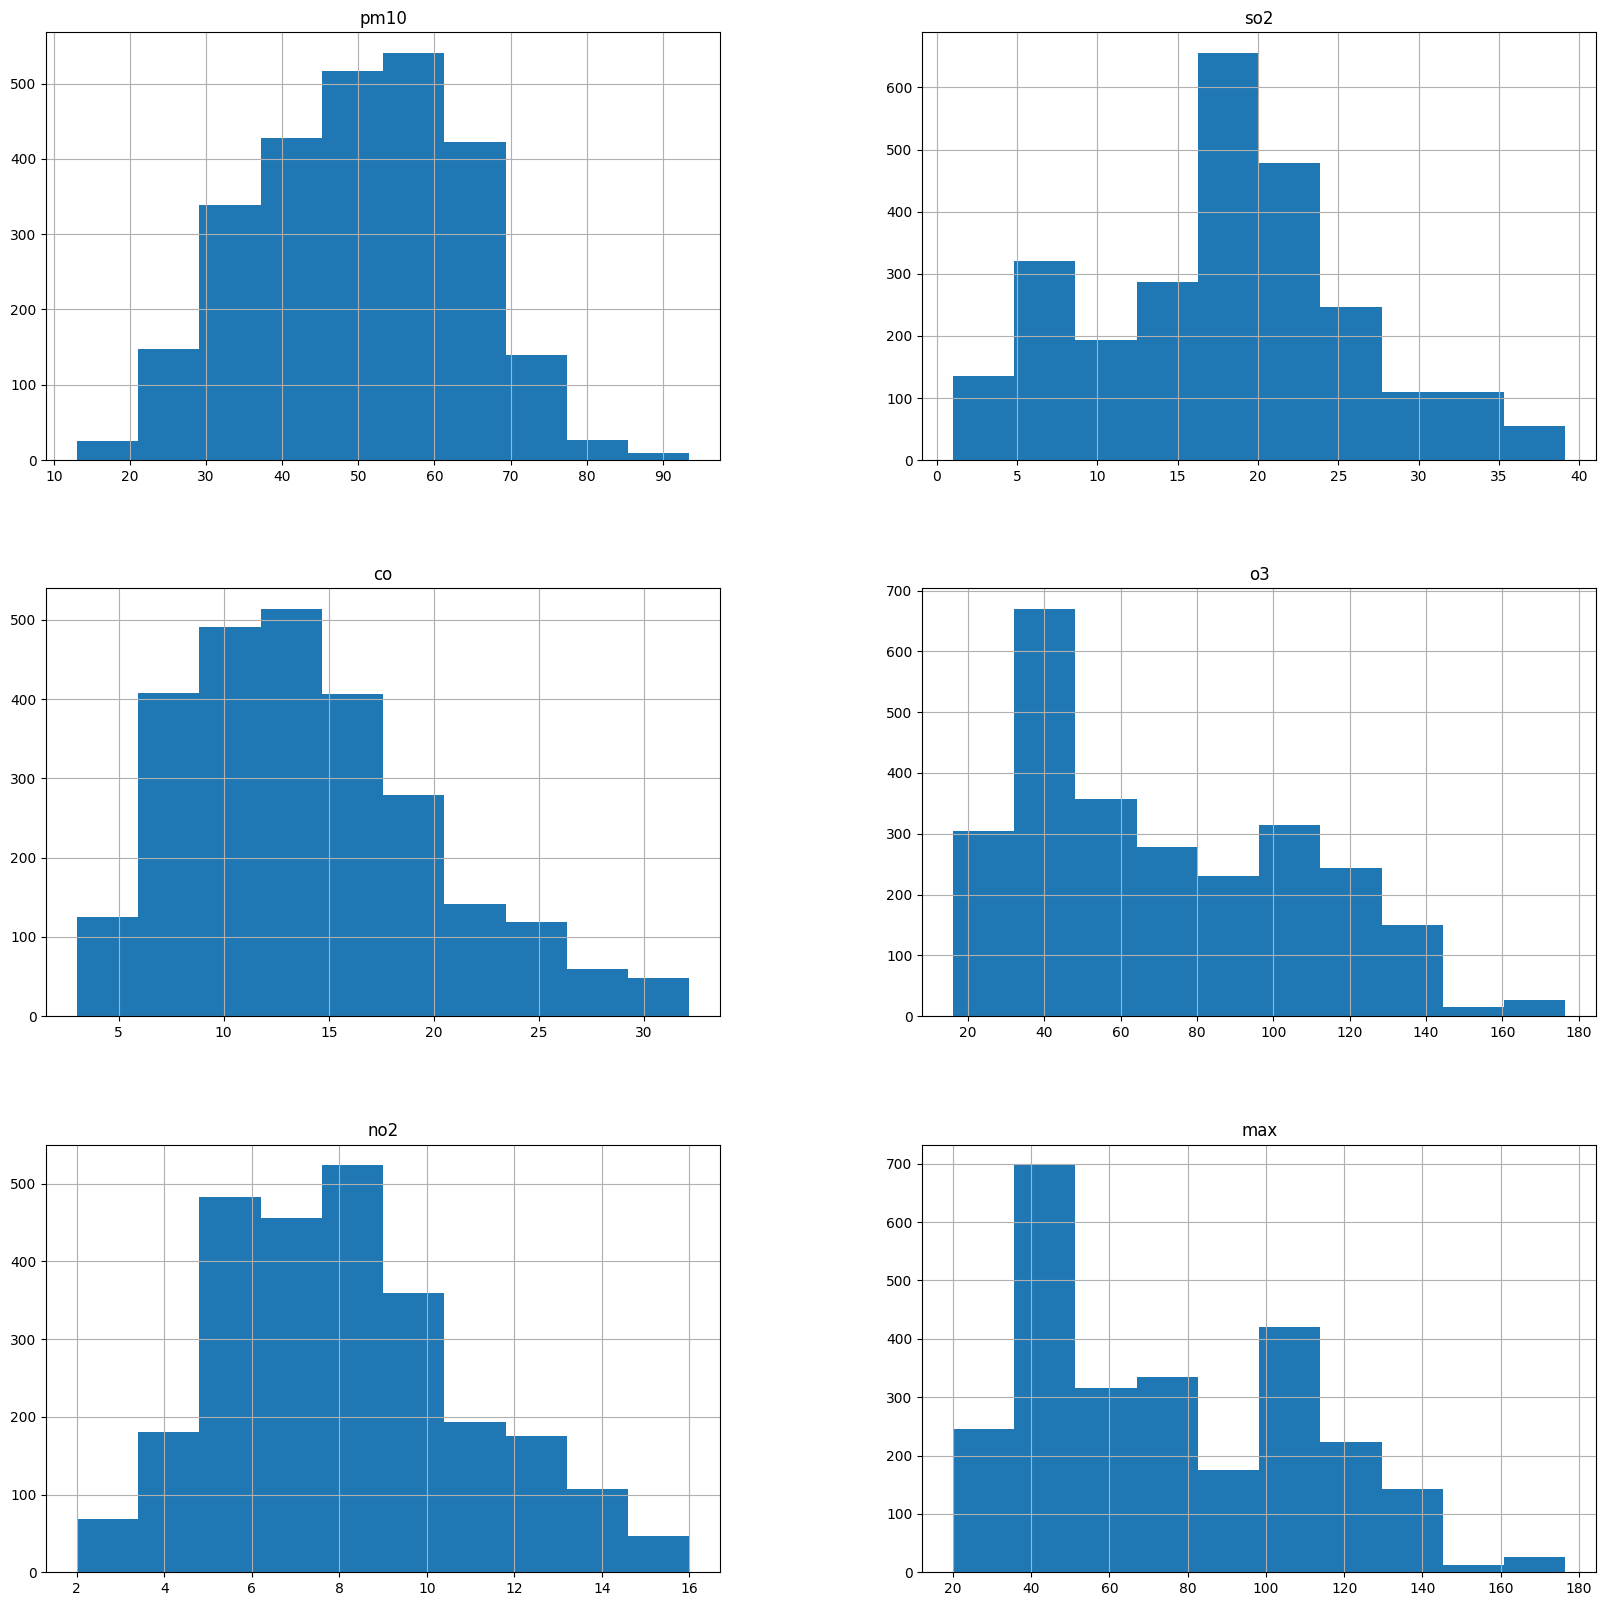

In [53]:
plot2 = X_res_noOutliers.hist(figsize = (20,20))

Dari visualisasi di atas, dapat kita simpulkan bahwa data yang sudah di sampling ini memiliki variance yang tinggi. Data dengan variance yang tinggi cenderung terlihat seperti histogram yang lebar dan menyebar, dengan beberapa bin yang terpisah jauh dari bin lainnya.

Algoritma yang kita pilih untuk menjadi model prediksi status pencemeran udara adalah Decision Tree dan Support Vector Machines. Kedua algoritma digunakan karena cenderung dapat bekerja dengan efektif pada data yang memiliki high variance.

### Decision Tree

In [54]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train , y_train)
dt_pred = dt_model.predict(X_test)

### Decision Tree GridSearch CV

In [55]:
dt_param = {'max_depth':[3,5,7,10,15],'min_samples_leaf':[3,5,10,15,20],'min_samples_split':[8,10,12,18,20,16],'criterion':['gini','entropy']}
dt_grid = GridSearchCV(estimator=dt_model,param_grid=dt_param,refit = True, verbose=True, scoring='accuracy')
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]},
             scoring='accuracy', verbose=True)

In [56]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10}

### Decision Tree Remodelling Using GridSearch Parameter

In [57]:
dt_grid_model = DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=3, min_samples_split=10)
dt_grid_model.fit(X_train, y_train)
dt_grid_pred = dt_grid_model.predict(X_test)

### Support Vector Machine (SVM)

In [58]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred_train = svc_model.predict(X_train)
svc_pred_test = svc_model.predict(X_test)

### SVC GridSearch CV

In [59]:
# svc_param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svc_param = {'C': [0.1,1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid']}
svc_grid = GridSearchCV(SVC(), svc_param, refit = True, verbose = True, scoring='accuracy')
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=True)

In [60]:
svc_grid.best_params_

{'C': 100, 'kernel': 'rbf'}

### SVC Remodelling Using GridSearch Parameter

In [61]:
svc_grid_model = SVC(C=100, kernel='rbf')
svc_grid_model.fit(X_train, y_train)
svc_grid_pred = svc_grid_model.predict(X_test)

## Evaluation

### Decision Tree

In [62]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       207
           1       0.85      0.81      0.83       192
           2       0.80      0.82      0.81       120

    accuracy                           0.88       519
   macro avg       0.87      0.87      0.87       519
weighted avg       0.88      0.88      0.88       519



In [63]:
print("{:.2f}%".format((accuracy_score(y_test, dt_pred))*100))

87.86%


### Decision Tree Using GridSearch

In [64]:
print(classification_report(y_test, dt_grid_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       207
           1       0.93      0.82      0.87       192
           2       0.77      1.00      0.87       120

    accuracy                           0.91       519
   macro avg       0.90      0.92      0.90       519
weighted avg       0.92      0.91      0.91       519



In [65]:
print("{:.2f}%".format((accuracy_score(y_test, dt_grid_pred))*100))

90.94%


### Support Vector Machine

In [66]:
print(classification_report(y_test, svc_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       207
           1       0.93      0.80      0.86       192
           2       0.77      1.00      0.87       120

    accuracy                           0.91       519
   macro avg       0.90      0.92      0.90       519
weighted avg       0.92      0.91      0.91       519



In [67]:
print("{:.2f}%".format((accuracy_score(y_test, svc_pred_test))*100))

90.56%


### SVC Using GridSearch

In [68]:
print(classification_report(y_test, svc_grid_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       207
           1       0.94      0.81      0.87       192
           2       0.77      0.99      0.87       120

    accuracy                           0.91       519
   macro avg       0.90      0.92      0.91       519
weighted avg       0.92      0.91      0.91       519



In [69]:
print("{:.2f}%".format((accuracy_score(y_test, svc_grid_pred))*100))

91.14%


## Kesimpulan

In [72]:
models = [dt_model, dt_grid_model, svc_model, svc_grid_model]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100

    print(f"{model}: {accuracy:.2f}%")

DecisionTreeClassifier(): 87.48%
DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=10): 90.94%
SVC(): 90.56%
SVC(C=100): 91.14%


Dari hasil yang telah diperoleh, dapat disimpulkan bahwa metode SVC dengan nilai C=100 memiliki akurasi yang paling tinggi, yaitu 91.14%. Ini menunjukkan bahwa metode ini mampu memberikan hasil yang paling akurat dalam memprediksi suatu kelas dibandingkan dengan metode DecisionTreeClassifier, DecisionTreeClassifier dengan GridSearch, dan SVC tanpa spesifikasi nilai C.

Namun, perlu diingat bahwa akurasi tidak selalu menjadi tolak ukur yang paling penting dalam menentukan metode yang terbaik. Ada beberapa faktor lain yang perlu dipertimbangkan, seperti kecepatan komputasi, stabilitas hasil, dan kemampuan dalam menangani data yang tidak terstruktur atau tidak lengkap. Oleh karena itu, perlu dilakukan evaluasi lebih lanjut terhadap ketiga metode tersebut untuk menentukan metode yang paling sesuai untuk digunakan dalam kasus yang spesifik.

Selain itu, perlu diperhatikan juga bahwa hasil dari metode-metode tersebut mungkin saja berbeda jika digunakan pada dataset yang berbeda. Oleh karena itu, perlu dilakukan uji coba terhadap metode-metode tersebut pada dataset yang berbeda untuk memastikan bahwa hasil yang diperoleh dapat diterapkan secara umum. Dengan demikian, dapat diambil kesimpulan bahwa metode SVC dengan nilai C=100 merupakan metode yang paling sesuai untuk digunakan dalam memprediksi suatu kelas, namun perlu dilakukan evaluasi lebih lanjut untuk memastikan kegunaan dan kinerja yang optimal dalam kondisi tertentu.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=66ed99b1-0f9c-4ef2-b363-6f7df81b8d34' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>